In [23]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Create the data

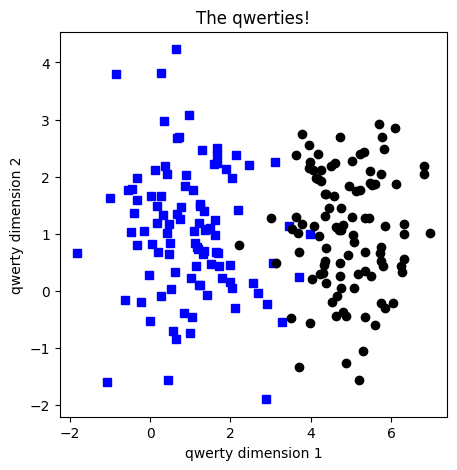

In [24]:
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Functions to build and train the model

In [25]:
def createANNmodel(LearningRates):

    ANNclassify = nn.Sequential(
    nn.Linear(2, 1),
    nn.ReLU(),
    nn.Linear(1, 1),
    )

    lossfun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=LearningRates)

    return ANNclassify, lossfun, optimizer
    

In [26]:
numepochs = 1000

def trainTheModel(ANNmodel):
    losses = torch.zeros(numepochs)
    
    for epochi in range(numepochs):

        yHat = ANNmodel(data)

        loss = lossfun(yHat, labels)
        losses[epochi] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    predictions = ANNmodel(data)
    totalacc = 100*torch.mean(((predictions>0) == labels).float())

    return losses,predictions,totalacc
        

Final accuracy: 96%


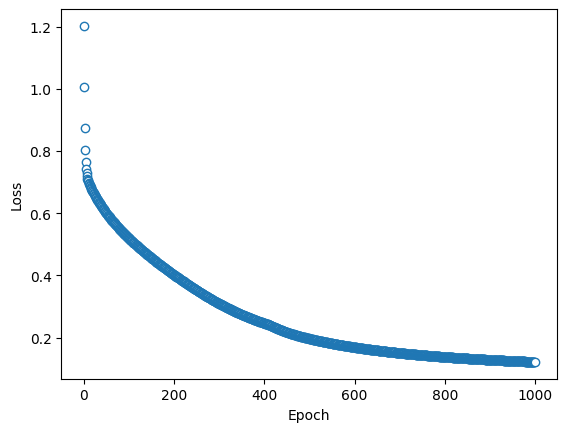

In [27]:
ANNclassify,lossfun,optimizer = createANNmodel(.05)

losses,predictions,totalacc = trainTheModel(ANNclassify)

print('Final accuracy: %g%%' %totalacc)


plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

In [28]:
learningrates = np.linspace(0.01, 0.1, 40)

accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))

for i,lr in enumerate(learningrates):
  
  ANNclassify,lossfun,optimizer = createANNmodel(lr)
  losses,predictions,totalacc = trainTheModel(ANNclassify)

  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()


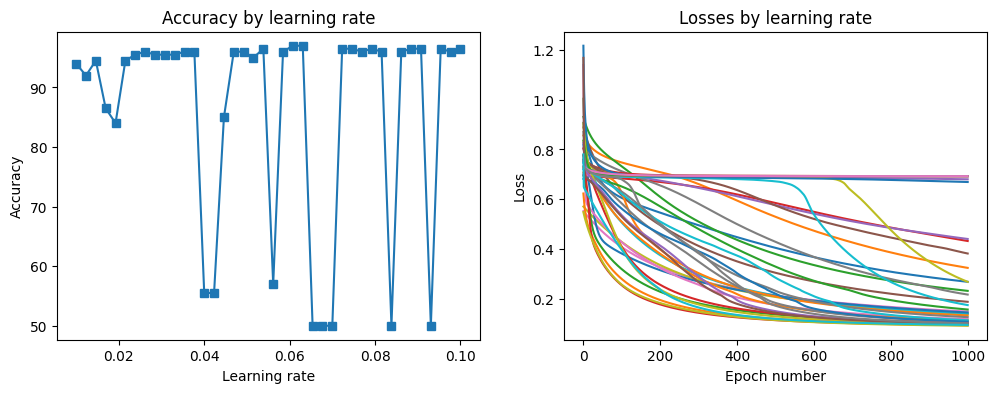

In [29]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [30]:
# proportion of runs where the model had at least 70% accuracy
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.8000)

### Sometimes the model got lucky with initial weights randomization.
### This means chances play an crucial role in the performance of the model

## Now we are going to repeat the same experiment N times and average the results

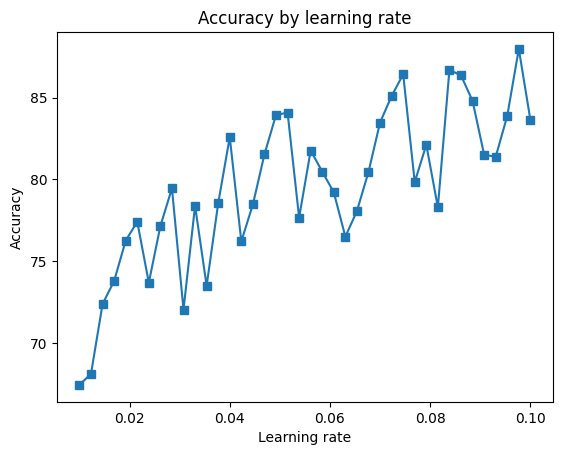

In [31]:
numExps = 50

accMeta = np.zeros((numExps,len(learningrates)))

numepochs = 500

for expi in range(numExps):
  for i,lr in enumerate(learningrates):
    
    ANNclassify,lossfun,optimizer = createANNmodel(lr)
    losses,predictions,totalacc = trainTheModel(ANNclassify)
    accMeta[expi,i] = totalacc


plt.plot(learningrates,np.mean(accMeta,axis=0),'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()

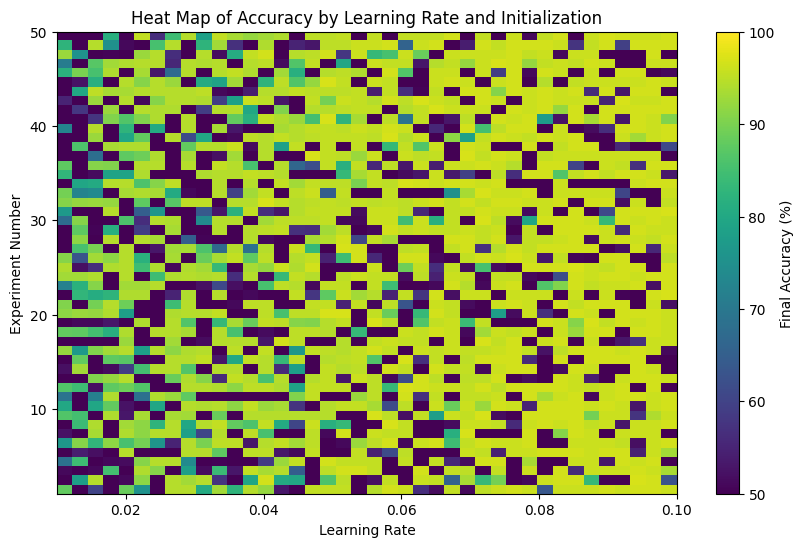

In [32]:
plt.figure(figsize=(10,6))

plt.imshow(
    accMeta,
    aspect='auto',
    origin='lower',
    extent=[learningrates[0], learningrates[-1], 1, numExps],
    vmin=50,
    vmax=100
)

plt.colorbar(label='Final Accuracy (%)')
plt.xlabel('Learning Rate')
plt.ylabel('Experiment Number')
plt.title('Heat Map of Accuracy by Learning Rate and Initialization')

plt.show()
